In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from fuzzywuzzy import fuzz #conda install -c conda-forge fuzzywuzzy
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #conda install -c conda-forge wordcloud
import plotly.graph_objects as go #conda install -c plotly plotly=4.7.1
from textblob import TextBlob #conda install -c conda-forge textblob



sns.set_palette("Set2")
tweets = pd.read_csv('data/train.csv').sort_values(by=['target'])
tweets

id       keyword                          location  \
3806   5408  fire%20truck                               NaN   
3444   4922      exploded                               USA   
3443   4920      exploded                  Elmwood Park, NJ   
6219   8875         smoke           3.28.15|7.20.15|7.25.15   
3440   4917      exploded                               NaN   
6220   8878         smoke               cigarknub@gmail.com   
3438   4914      exploded                            London   
3445   4923      exploded                               NaN   
3436   4912      exploded                    Trost District   
3434   4910       explode                               NaN   
3433   4909       explode                     New Hampshire   
3432   4908       explode                          Winnipeg   
3431   4906       explode                               NaN   
3430   4905       explode                               NaN   
3429   4903       explode                               NaN   
6222   8881         smoke                               NaN   
6217   8871         smoke                               NaN   
3447   4926      exploded                 South east of U.K   
3448   4929      exploded                               NaN   
3463   4954      exploded                           Germany   
6215   8866         smoke                        WORLDWI$E    
3461   4952      exploded                               NaN   
3460   4951      exploded                               NaN   
3459   4948      exploded  WonderlandÛÓ ?????? ???? ??????   
3458   4946      exploded                               NaN   
6216   8869         smoke                           atlanta   
3456   4944      exploded                           Jamaica   
3455   4943      exploded                   Antigua ?? NYC    
3454   4940      exploded                       Oakland, Ca   
3453   4938      exploded     lrhcthband;four - bournemouth   
...     ...           ...                               ...   
3644   5193    fatalities              oman muscat al seeb    
3642   5191    fatalities              Caserta-Roma, Italy    
3654   5203    fatalities                               NaN   
3641   5190    fatalities            St. John's, NL, Canada   
3638   5187    fatalities                    Youngstown, OH   
3637   5186    fatalities                               NaN   
3632   5181    fatalities                    Washington, DC   
3629   5178    fatalities                               NaN   
3628   5177    fatalities    Washington, DC & Charlotte, NC   
3626   5175    fatalities         #WashingtonState #Seattle   
3640   5189    fatalities                    Nantes, France   
3623   5171    fatalities         Wolverhampton/Brum/Jersey   
3656   5206    fatalities                  Philadelphia, PA   
3658   5208    fatalities                               NaN   
3714   5282          fear                    Midwestern USA   
3711   5278          fear                               NaN   
3695   5257      fatality                               NaN   
3692   5254      fatality        Bishops Stortford, England   
3691   5252      fatality                     Nashville, TN   
3688   5248      fatality                               NaN   
3657   5207    fatalities         Just Happy to Be Anywhere   
3679   5234      fatality                             U.S.A   
3671   5226      fatality                               NaN   
3669   5223      fatality                               NaN   
3668   5222      fatality             Boston Û¢ Cape Cod ?   
3663   5213      fatality                               NaN   
3660   5210    fatalities                           Ireland   
3659   5209    fatalities                        Lima, Ohio   
3673   5228      fatality                    Fort Wayne, IN   
7612  10873           NaN                               NaN   

                                                   text  target  
3806  Former Township fire truck bei

In [2]:
tweets['target'] = tweets['target'].transform(lambda x: 'Real' if x == 1 else 'Falso')
tweets['keyword'] = tweets['keyword'].transform(lambda x: x.str.replace("%20", " "))
tweets_text = tweets.loc[:,['text','target']]


tweets_text

text target
3806  Former Township fire truck being used in Phili...  Falso
3444  The Dress Memes Have Officially Exploded On Th...  Falso
3443  Well as I was chaning an iPad screen it fuckin...  Falso
6219  So does Austin smoke too since he agreed to th...  Falso
3440  Im Dead!!! My two Loves in 1 photo! My Heart e...  Falso
6220                Smoke it all http://t.co/79upYdCeMp  Falso
3438  A tin of Tesco dog food 'exploded' and prompte...  Falso
3445  My little heart just exploded #OTRAMETLIFE #MT...  Falso
3436  @CrimsonFuckingV @BitchL0veCannon Even you hav...  Falso
3434  Toronto going crazy for the blue jays. Can you...  Falso
3433  @DelDryden If I press on the twitch will my he...  Falso
3432       I'm ready to explode! http://t.co/OwJe3i6yGN  Falso
3431                           My head is gonna explode  Falso
3430  @Anonchimp think its a tie with thunderstorms ...  Falso
3429  Learn How I Gained Access To The Secrets Of Th...  Falso
6222  If you wanna smoke cigs that's your own proble...  Falso
6217                Be Trynna smoke TJ out but he a hoe  Falso
3447  Just saw The Man Whose Mind Exploded. There sh...  Falso
3448  I read about that break for hours before twitt...  Falso
3463  @lunasagalle @synapsenkotze \n'The Exploded - ...  Falso
6215  I smoke toooooo much lmao I was scared to text...  Falso
3461  that exploded &amp; brought about the\nbeginni...  Falso
3460  Yumiko jumped in surprise as the fire shot upw...  Falso
3459                           My head exploded i swear  Falso
3458  @MeryCormier haha! Exactly! Cosima is definite...  Falso
6216          @TheTshirtKid I'm tryna smoke that MF out  Falso
3456  @ItsNasB now I have to go replace my sarcasm m...  Falso
3455  Did this man just squeeze another man's head w...  Falso
3454  holy crap @KingMyth1999 my phone just exploded...  Falso
3453               luke + microphone = exploded ovaries  Falso
...                                                 ...    ...
3644  I liked a @YouTube video http://t.co/43sXG9Z6x...   Real
3642  Govt allocating 1.3 bn for flood action: Issue...   Real
3654  No UK train accident fatalities for 8th year r...   Real
3641  The RCMP are reporting fatalities and serious ...   Real
3638  OSP concerned about mounting fatalities http:/...   Real
3637  -??-\n; kitana\n? her fatalities slay me\nÛÓk...   Real
3632  #Saudi Arabia: #Abha: Fatalities reported foll...   Real
3629  Injuries Illnesses and Fatalities Latest Numbe...   Real
3628  @unsuckdcmetro minor train leaves rails. Major...   Real
3626  #Seattle's deadliest red light runner intersec...   Real
3640  Estimated damage and fatalities of an Hiroshim...   Real
3623  Understand that there are no fatalities as no ...   Real
3656  PolicyLab is at @CECANF's last public hearing ...   Real
3658  #Shipping #Logistics eNCA | Fatalities as migr...   Real
3714  @CowgirlLawyer We must refuse to become a nati...   Real
3711  The Opposite of Love is Fear HereÛªs Why\nhtt...   Real
3695  Death of Loretta Fuddy responsible for authent...   Real
3692  @LindaSOCVAT @TfLBusAlerts Yes apparently. Rep...   Real
3691  Truck crash on 40w at US70 in Lebanon is a fat...   Real
3688                   Fatality https://t.co/GF5qjGoyCi   Real
3657  .@KurtSchlichter Yep considering that *million...   Real
3679  Afghan Soldier Kills US General America's High...   Real
3671  Wow fatality on 101 big rig hit motorcyclist b...   Real
3669  @hrips_k when u do a fatality and like the cor...   Real
3668  Dying of Lyme disease: Case fatality rate near...   Real
3663                             @Truly_Stings Yo Dm me   Real
3660  Driver fatalities down on Irish roads but pede...   Real
3659  Message boards will display updated traffic fa...   Real
3673  Kosciusko police investigating pedestrian fata...   Real
7612  The Latest: More Homes Razed by Northern Calif...   Real

[7613 rows x 2 columns]

# Cuál es la distribución entre tweets Reales y Falsos? 

In [3]:
tweets_by_target = tweets_text.target.value_counts().reset_index()
tweets_by_target.head(2)

index  target
0  Falso    4342
1   Real    3271

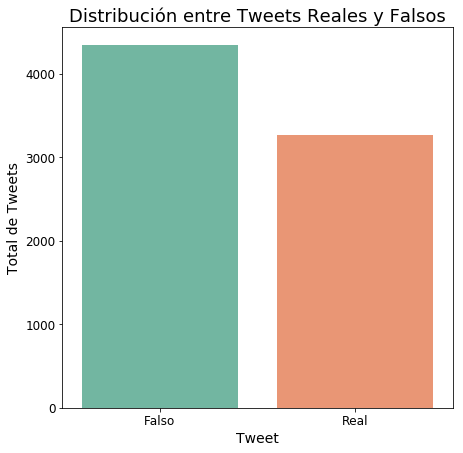

In [4]:
rcParams['figure.figsize'] = 7,7
ax = sns.barplot(data = tweets_by_target,x='index',y='target')
ax.set_title("Distribución entre Tweets Reales y Falsos",fontsize= 18)
ax.set_ylabel("Total de Tweets",fontsize= 14)
ax.set_xlabel("Tweet",fontsize= 14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)

# Relación cantidad de palabras del tweet y veracidad

Se indica para cada tweet cuantas palabras posee el texto

In [5]:
tweets_text['total_words'] = tweets_text.text.transform(lambda x: len(x.split(" ")))

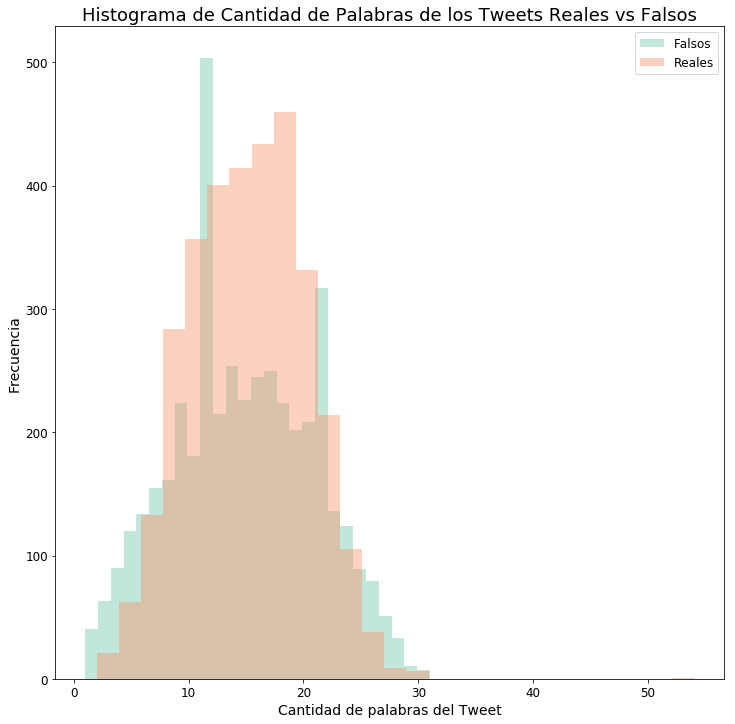

In [6]:
rcParams['figure.figsize'] = 12,12
total_bins = tweets_text.total_words.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','total_words'],  kde=False, label='Falsos',bins = total_bins)
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','total_words'],  kde=False, label='Reales', bins = total_bins)
plt.legend(prop={'size': 12})
plt.title("Histograma de Cantidad de Palabras de los Tweets Reales vs Falsos",fontsize= 18)
plt.xlabel("Cantidad de palabras del Tweet",fontsize= 14)
plt.ylabel('Frecuencia',fontsize= 14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)

# Relación entre la cantidad de caracteres y  veracidad del tweet

In [7]:
tweets_text['len_text'] = tweets_text.text.transform(lambda x: len(x))


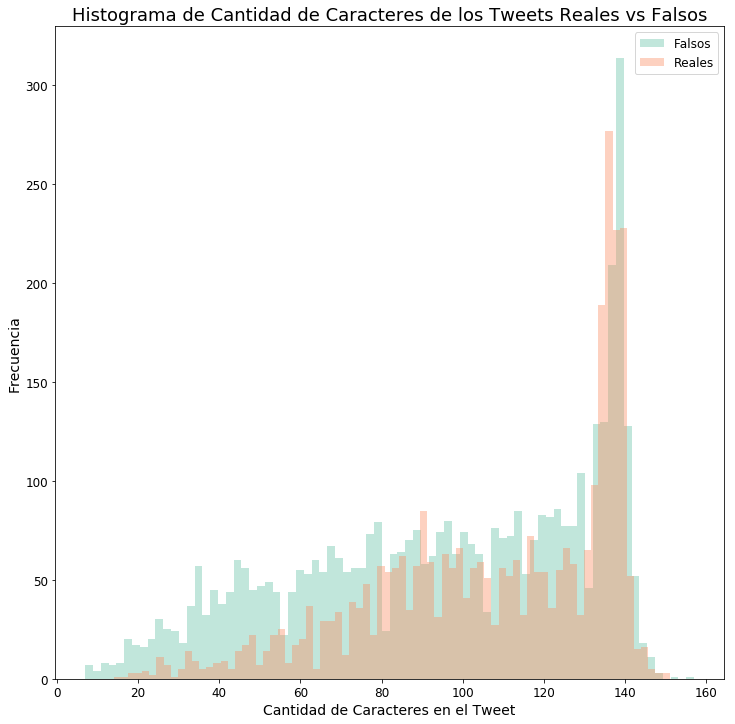

In [8]:
total_bins = tweets_text.len_text.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','len_text'],  kde=False, label='Falsos',bins = total_bins)
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','len_text'],  kde=False, label='Reales', bins = total_bins)
plt.legend(prop={'size': 12})
plt.title("Histograma de Cantidad de Caracteres de los Tweets Reales vs Falsos",fontsize= 18)
plt.xlabel("Cantidad de Caracteres en el Tweet",fontsize= 14)
plt.ylabel('Frecuencia',fontsize= 14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)

# ¿Existe diferencias entre las distribuciones de los tweets según su cantidad de palabras y longitud del texto?

In [9]:
tweets_text['len_text_normal'] = (tweets_text.len_text-tweets_text.len_text.mean()) /np.std(tweets_text.len_text)
tweets_text['total_words_normal'] = (tweets_text.total_words-tweets_text.total_words.mean()) /np.std(tweets_text.total_words)


Text(0.5,0,'Longitud de texto o catidad de palabras normalizado')

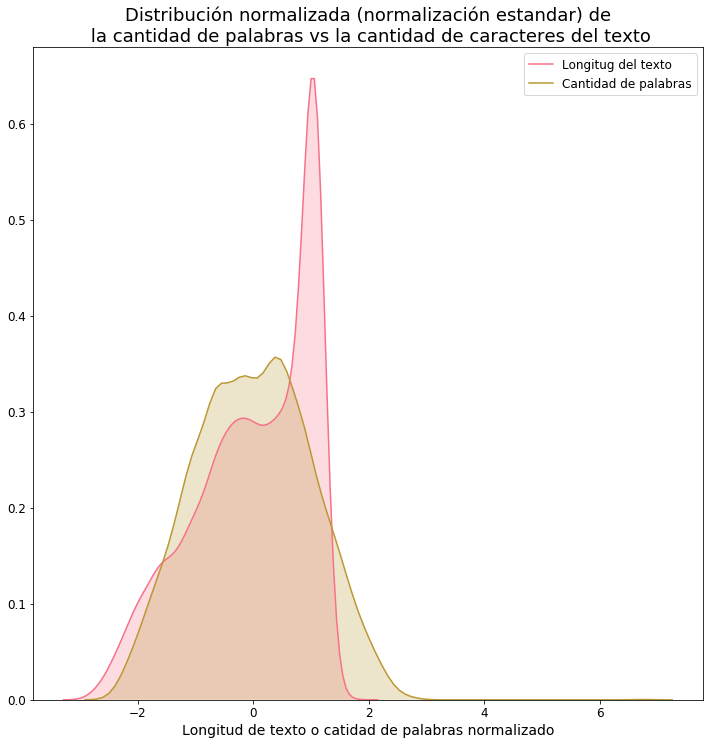

In [10]:
sns.set_palette("husl")
sns.kdeplot(tweets_text.len_text_normal, label='Longitug del texto',shade=True)
sns.kdeplot(tweets_text.total_words_normal, label='Cantidad de palabras',shade=True)
plt.legend(prop={'size': 12})
plt.title("Distribución normalizada (normalización estandar) de\n la cantidad de palabras vs la cantidad de caracteres del texto",fontsize=18)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)
plt.xlabel("Longitud de texto o catidad de palabras normalizado",fontsize= 14)




# Cuál es la correlación entre la cantidad de palabras del tweet y su longitud separados por target?

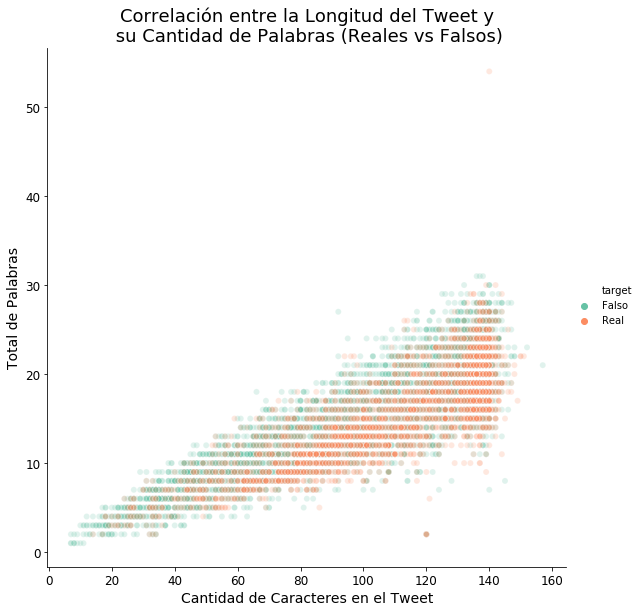

In [11]:
sns.set_palette("Set2")
scater = sns.relplot(y="total_words", x="len_text", hue="target", alpha=.2,height=8, data=tweets_text)
plt.title("Correlación entre la Longitud del Tweet y\n su Cantidad de Palabras (Reales vs Falsos)",fontsize= 18)
plt.xlabel("Cantidad de Caracteres en el Tweet",fontsize= 14)
plt.ylabel('Total de Palabras',fontsize= 14)
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)

# Relación entre la cantidad de caracteres de un tipo específico (mayusculas,numéricos y especiales) y la veracidad del tweet

In [12]:
#Recibe un string y devuelve la cantidad de caracteres en mayusculas que posee
def get_upper_total(s):
    total = 0
    for x in s:
        y = ord(x)
        if y > 90:
            continue
        if y > 64:
            total = total + 1
    return total

#Recibe un string y devuelve la cantidad de caracteres numéricos que posee
def get_total_numbers_chars(s):
    total = 0
    for x in s:
        y = ord(x)
        if y in range(48,58):
            total = total + 1
    return total
#Recibe un string y devuelve la cantidad de caracteres especiales que posee (excluye una lista de caracteres comunes)
def get_special_chars_total(s):
    total = 0
    common_esp_chr = [" ",".","?",",","!"]
    for x in s:
        y = ord(x)
        if y in range(97,123) or y in range(65,91) or y in range(48,58) or x in common_esp_chr:
            continue
        total = total + 1
    return total

Se obtiene para cada tweet la cantidad de caracteres en mayusculas que posee el texto

In [13]:
tweets_text['total_upper_chars'] = tweets_text.text.transform(lambda x: get_upper_total(x))

Se obtiene para cada tweet la cantidad de caracteres numéricos que posee el texto

In [14]:
tweets_text['total_numbers_chars'] = tweets_text.text.transform(lambda x: get_total_numbers_chars(x))

Se obtiene para cada tweet la cantidad de caracteres especiales que posee el texto (sin incluir los mas comunes)

In [15]:
tweets_text['total_special_chars'] = tweets_text.text.transform(lambda x: get_special_chars_total(x))

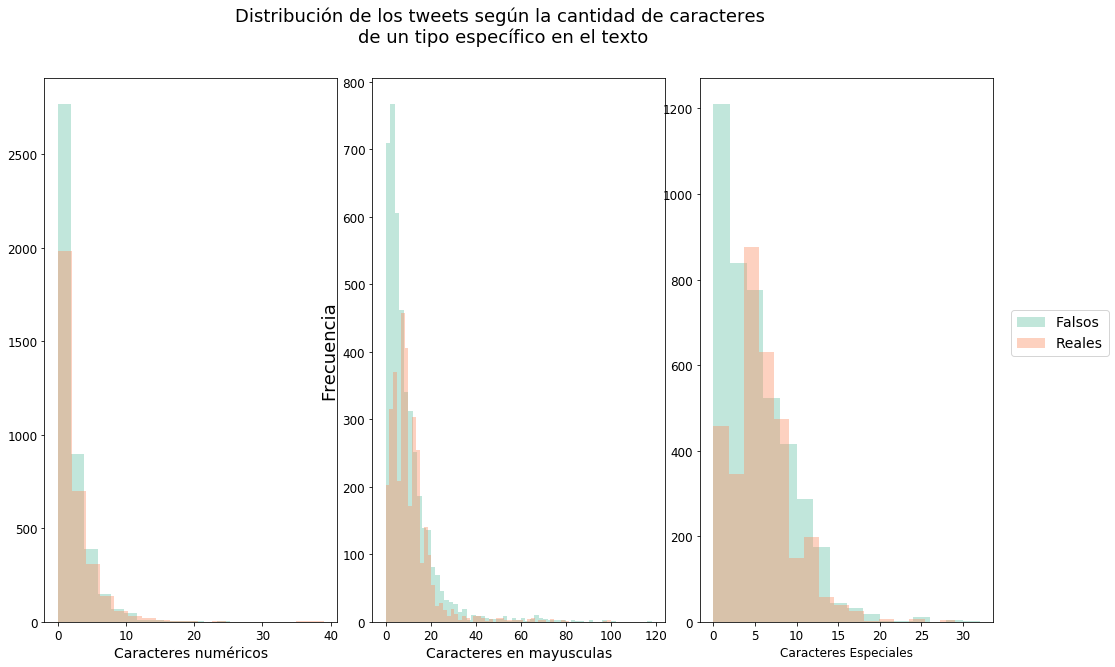

In [16]:

f, ax = plt.subplots(1, 3, figsize=(17,10),gridspec_kw={'wspace': 0.12})

total_bins = tweets_text.total_upper_chars.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','total_upper_chars'],  kde=False, label='Falsos',bins = total_bins,ax=ax[1])
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','total_upper_chars'],  kde=False, label='Reales', bins = total_bins,ax=ax[1])
ax[1].set_xlabel("Caracteres en mayusculas", fontsize=14)
ax[1].set_ylabel('Frecuencia', fontsize=18)



total_bins = tweets_text.total_numbers_chars.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','total_numbers_chars'],  kde=False, label='Falsos',bins = total_bins,ax=ax[0])
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','total_numbers_chars'],  kde=False, label='Reales', bins = total_bins,ax=ax[0])
ax[0].set_xlabel("Caracteres numéricos", fontsize=14)



total_bins = tweets_text.total_special_chars.max()//2
sns.distplot(tweets_text.loc[tweets_text.target== 'Falso','total_special_chars'],  kde=False, label='Falsos',bins = total_bins,ax=ax[2])
sns.distplot(tweets_text.loc[tweets_text.target== 'Real','total_special_chars'],  kde=False, label='Reales', bins = total_bins,ax=ax[2])
ax[2].set_xlabel("Caracteres Especiales", fontsize=12)

f.suptitle('Distribución de los tweets según la cantidad de caracteres \nde un tipo específico en el texto', fontsize=18)
f.legend(["Falsos","Reales"],prop={'size': 14},loc=5)
ax[0].tick_params(axis="y", labelsize=12)
ax[1].tick_params(axis="y", labelsize=12)
ax[2].tick_params(axis="y", labelsize=12)
ax[0].tick_params(axis="x", labelsize=12)
ax[1].tick_params(axis="x", labelsize=12)
ax[2].tick_params(axis="x", labelsize=12)


# ¿Incluyen los tweets elementos especiales como preguntas o enlaces ? como se distribuyen con relación al target

Indicamos para cada tweet si posee o no una pregunta (se asume que la posee si contiene el caracter "?")

In [17]:
tweets_text['contain_question'] = tweets_text.text.transform(lambda x: "?" in x)

Indicamos para cada tweet si posee o no un enlace (se asume que la posee si contiene "http")

In [18]:
tweets_text['contain_link'] = tweets_text.text.transform(lambda x: "http" in x)

Text(0.5,0.98,'Cantidad de tweets con enlaces y la cantidad con preguntas según su veracidad')

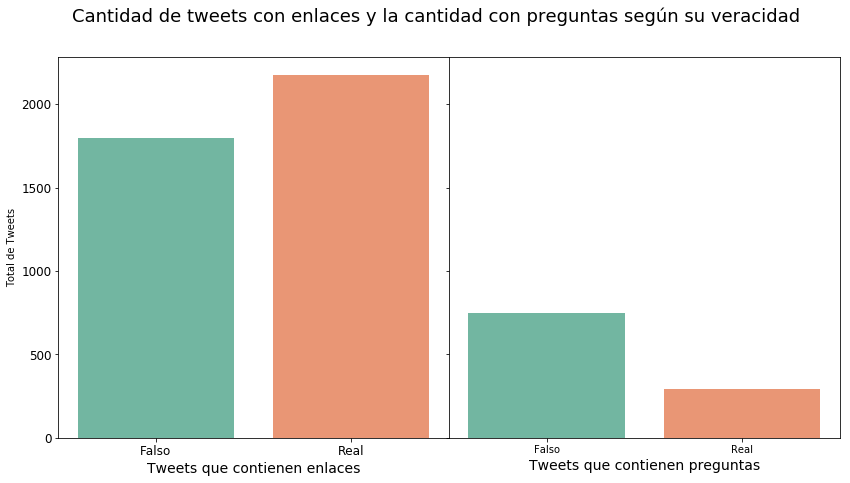

In [19]:
f, ax = plt.subplots(1, 2, figsize=(14,7),gridspec_kw={'wspace': 0})

sns.barplot(data = tweets_text.loc[tweets_text.contain_link == True].target.value_counts().reset_index().sort_values(by=['target']),x='index',y='target',ax=ax[0])
ax[0].set_ylabel("Total de Tweets")
ax[0].set_xlabel("Tweets que contienen enlaces",fontsize=14)

sns.barplot(data = tweets_text.loc[tweets_text.contain_question == True].target.value_counts().reset_index(),x='index',y='target',ax=ax[1])
ax[1].set_xlabel("Tweets que contienen preguntas",fontsize=14)

ax[0].label_outer()
ax[1].label_outer()
ax[1].set_ylim(ax[0].get_ylim())

ax[0].tick_params(axis="x", labelsize=12)
ax[0].tick_params(axis="x", labelsize=12)
ax[0].tick_params(axis="y", labelsize=12)


f.suptitle('Cantidad de tweets con enlaces y la cantidad con preguntas según su veracidad', fontsize=18)


# Analisis del "sentimiento" del texto

La biblioteca de textblob posee una función que analiza el "sentimiento" de un texto, generando dos métricas llamadas polaridad y subjetividad. La primera es un float entre -1 y 1, para la cual mientras mas cerca del 1 este entonces es un sentimiento positivo (es más negativo mientras más se acerca al -1 y es más neutro cuanto más se acerque al 0). La segunda es un float entre 0 y 1, el sentimiento será más subjetivo cuanto mayor sea el valor.   

In [20]:
def subjectivityText(x):
  t=TextBlob(x)
  return t.sentiment.subjectivity
def polarityText(x):
  t=TextBlob(x)
  return t.sentiment.polarity

Se generan las columnas con su respectiva polaridad y subjetividad de cada texto

In [21]:
tweets_text["subjectivity_text"]=tweets_text.text.transform(subjectivityText)
tweets_text["polarity_text"]=tweets_text.text.transform(polarityText)


# ¿Cómo se distribuye la polaridad y la subjetividad de los textos diferenciados por target?

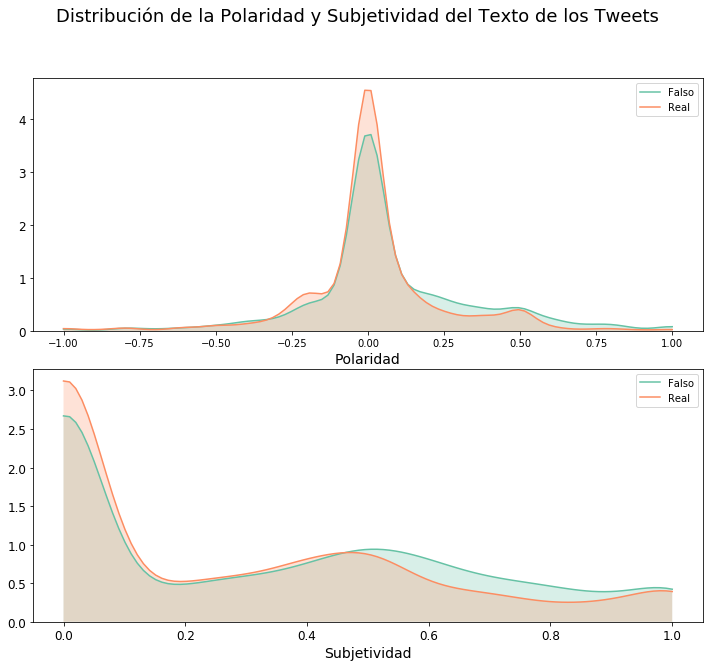

In [22]:
f, ax = plt.subplots(2, 1, figsize=(12,10),gridspec_kw={'hspace': 0.15})
sns.kdeplot(tweets_text.loc[tweets_text.target == 'Falso'].polarity_text, label='Falso',shade=True,ax=ax[0],cut=0)
sns.kdeplot(tweets_text.loc[tweets_text.target == 'Real'].polarity_text, label='Real',shade=True,ax=ax[0],cut=0)

sns.kdeplot(tweets_text.loc[tweets_text.target == 'Falso'].subjectivity_text, label='Falso',shade=True,ax=ax[1],cut=0)
sns.kdeplot(tweets_text.loc[tweets_text.target == 'Real'].subjectivity_text, label='Real',shade=True,ax=ax[1],cut=0)

f.suptitle('Distribución de la Polaridad y Subjetividad del Texto de los Tweets', fontsize=18)


ax[0].set_xlabel("Polaridad",fontsize=14)
ax[1].set_xlabel("Subjetividad",fontsize=14)

ax[0].tick_params(axis="y", labelsize=12)
ax[1].tick_params(axis="x", labelsize=12)
ax[1].tick_params(axis="y", labelsize=12)



#  ¿Se puede establecer un conjunto de palabras que dado un tweet que contenga al menos una, indique si es real o falso?


Para esto se hará un analsis de cada palabra en base a su frecuencia y longitud, el cual consistirá en buscar las palabras y su grado de veracidad (sobre aquellos tweets que contienen la palabra: porcentaje que son reales) 

Se crea un DataFrame con todas las palabras y sus frecuencias 

In [23]:
words = []
for x in tweets_text.text.tolist():
    for y in x.split(" "):
        words.append(y.lower())
df_words = pd.Series(words).value_counts().to_frame().reset_index()
df_words.columns = ['word','frecuency']

In [24]:
# Recibe las listas l1=[a1,a2,...,an] y l2=[b1,b2,...,bm] y las extiendea ambas a n x m elementos con la forma:
#  l1=[a1,...,a1,a2,...,a2,...,an,...,an] (m veces para cada elemento)
#  l2=[b1,b2,...,bm,b1,b2,...,bm] (n veces para cada m elementos)
#  Además devuelve una tercera lista con el producto cartesiano de las dos listas anteriores
def separate_cartesian_product_list(lenght_list, frecuency_list):
    first_list = lenght_list.copy()
    second_list = frecuency_list.copy()
    for x in range(len(second_list)-1):
        lenght_list.extend(first_list)
    lenght_list.sort()  
    for x in range(len(first_list)-1):
        frecuency_list.extend(second_list)
    
    third_list = []
    for x in first_list:
        for y in second_list:
            third_list.append((x,y))
    return third_list

In [25]:
#Se crean dos listas, la primera contiene todas las longitudes mínimas y la segunda contiene las frecuencias mínimas
#que se imponen para pertenecer al conjuto de palabras más frecuentes. 
#Se crea un dataframe donde cada registro determina un conjunto de palabras, ya que este contiene las variables antes 
#mencionadas y además una dupla con los mismos valores
word_lenght = list(range(1,10))
word_frecuency = list(range(10,140,10))

len_vs_fre = separate_cartesian_product_list(word_lenght,word_frecuency)
tweets_frec_len = pd.DataFrame({'lenght_min':word_lenght,'frecuency_min':word_frecuency, 'len_and_fre':len_vs_fre}) 


In [26]:
#Recibe un string y una colección de palabras, devuelve True en caso que al menos una de las palabras del string
#este contenida en la colección, Devuelve Falso para el caso contrario. 
def contain_long_words(s,long_words):
    for x in s.lower().split(" "):
        if x in long_words:
            return True
    return False

In [27]:
#Recibe una dupla de elementos: (longitud min,frecuencia min). devuelve el porcentaje de tweets reales de aquellos
#que continen al menos una palabra del conjunto de palabras mas frecuentes determinados por longitud min y frecuencia min
def get_true_percentage(x):
    long_words = df_words.loc[df_words['word'].transform(lambda y: len(y) >=  x[0])].loc[df_words.frecuency >= x[1],'word'].tolist()
    tweets_text['contain_long_word'] = tweets_text['text'].transform(lambda y: contain_long_words(y,long_words))
    tweets_contain_long_words = tweets_text.loc[tweets_text.contain_long_word == True,:]
    total_true =tweets_contain_long_words.loc[tweets_text.target == 'Real','target'].count()
    total_False = tweets_contain_long_words.loc[tweets_text.target == 'Falso','target'].count()

    return total_true*100/(total_true +total_False)

El siguiente dataframe indica los porcentajes de tweets reales de aquellos que por lo menos una de sus palabras se encuentran en las palabras más frecuentes de logintud min y frecuencia min especificados

In [28]:
tweets_frec_len['true_percentage'] = tweets_frec_len['len_and_fre'].transform(lambda x: get_true_percentage(x)) 
data_for_heatmap =tweets_frec_len.drop(columns=['len_and_fre']).set_index(['frecuency_min','lenght_min']).unstack()
data_for_heatmap.columns = list(range(1,10))

data_for_heatmap

1          2          3          4          5  \
frecuency_min                                                          
10             43.118052  43.137515  43.209055  43.455427  44.424183   
20             43.158593  43.184239  43.258502  43.557019  45.283019   
30             43.234545  43.217708  43.238016  44.057377  47.525952   
40             43.156897  43.272777  43.074058  44.207511  49.178228   
50             43.143130  43.242499  42.850858  44.069807  51.133368   
60             43.193323  43.313953  42.801788  44.159292  52.095097   
70             43.160927  43.319444  42.443973  43.571693  52.025877   
80             43.151815  43.294806  42.255892  43.485814  51.019665   
90             43.103925  43.261418  41.906391  43.311071  50.870322   
100            43.150590  43.420495  41.632133  43.150389  47.502498   
110            43.133167  43.365466  41.359223  42.237288  46.061644   
120            43.222114  43.542172  41.546290  42.793322  46.535283   
130            43.236816  43.513746  41.271696  41.949888  45.036916   

                       6          7          8          9  
frecuency_min                                              
10             46.119426  48.717022  51.631617  55.107426  
20             47.817869  50.135107  52.361981  55.550416  
30             51.460778  55.363215  58.612770  64.050633  
40             55.491744  60.400445  64.926740  67.706013  
50             59.240759  64.690497  68.850267  71.774194  
60             60.654725  66.145354  68.571429  71.774194  
70             64.388186  64.311377  64.116576  66.773163  
80             66.852886  67.402597  64.116576  66.773163  
90             68.798236  70.333333  69.135802  66.519824  
100            63.623395  65.771812  58.723404  47.101449  
110            58.842975  57.391304  58.723404  47.101449  
120            59.840954  58.723404  58.723404  47.101449  
130            50.328947  47.101449  47.101449  47.101449

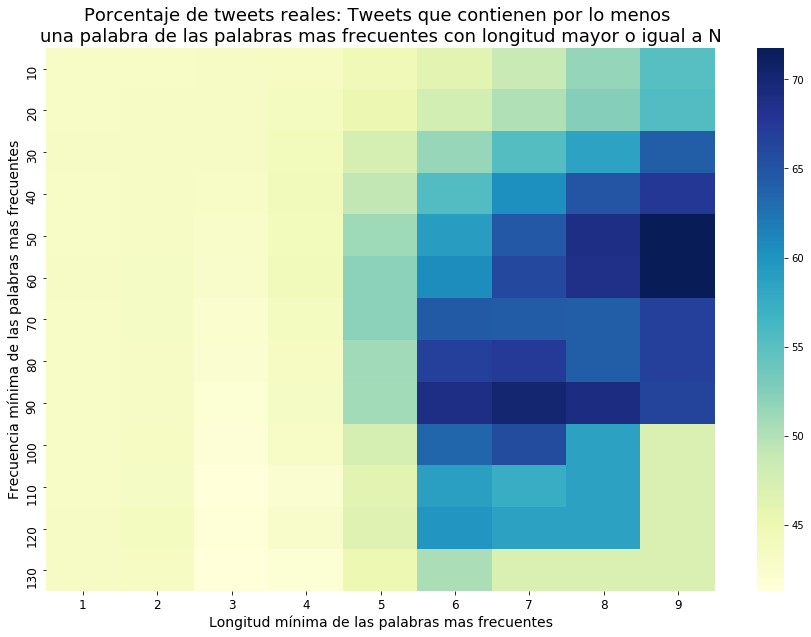

In [29]:
rcParams['figure.figsize'] = 15,10
heatmap = sns.heatmap(data_for_heatmap,cmap="YlGnBu")
heatmap.set_title("Porcentaje de tweets reales: Tweets que contienen por lo menos \nuna palabra de las palabras mas frecuentes con longitud mayor o igual a N",fontsize= 18)
heatmap.set_xlabel("Longitud mínima de las palabras mas frecuentes",fontsize= 14)
heatmap.set_ylabel("Frecuencia mínima de las palabras mas frecuentes",fontsize= 14)
heatmap.tick_params(axis="y", labelsize=12)
heatmap.tick_params(axis="x", labelsize=12)


In [30]:
def get_true_pertentage_word(x):
    x_list = []
    x_list.append(x)
    tweets_text['contain_long_word'] = tweets_text['text'].transform(lambda y: contain_long_words(y,x_list))
    tweets_contain_long_words = tweets_text.loc[tweets_text.contain_long_word == True,:]
    total_true =tweets_contain_long_words.loc[tweets_text.target == 'Real','target'].count()
    total_False = tweets_contain_long_words.loc[tweets_text.target == 'Falso','target'].count()
    if (total_true +total_False) == False:
        print(x)
        print(tweets_contain_long_words)
    return total_true*100/(total_true +total_False),total_true

In [31]:
words_set = pd.DataFrame(df_words.loc[df_words['word'].transform(lambda y: len(y) >=  5)].loc[df_words.frecuency >= 30,'word'].tolist())
words_set['percentage_true'] = words_set[0].transform(lambda x: get_true_pertentage_word(x))
words_set['total_tweets_true'] = words_set['percentage_true'].transform(lambda x: x[1]).astype('int')
words_set['percentage_true'] = words_set['percentage_true'].transform(lambda x: x[0]).astype('int')


Se toman las palabras tienen más de un 75% de veracidad y que haya más de 30 de estos (este sería el conjunto de palabras buscados)

In [32]:
best_words = words_set.loc[words_set.percentage_true > 75].loc[words_set.total_tweets_true >30][0].tolist()
best_words

['suicide',
 'killed',
 'california',
 'families',
 'train',
 'crash',
 'fires',
 'bombing',
 'accident',
 'fatal',
 'northern',
 'bomber',
 'hiroshima',
 'obama',
 'atomic',
 'homes',
 'forest',
 'found',
 'wildfire',
 'debris',
 'evacuation',
 'malaysia',
 'severe',
 'injured',
 'warning',
 'spill',
 'japan',
 'missing',
 'wreckage',
 'mh370:',
 'thunderstorm',
 'migrants',
 'outbreak',
 'investigators',
 'saudi',
 'kills',
 'anniversary',
 'hundreds',
 'affected',
 'rescuers',
 'reunion',
 'detonated',
 "legionnaires'",
 'latest:']

Se indica a cada tweet si contiene o no al menos una palabra de esta "bolsa de palabras"

In [33]:
tweets_text['contain_long_word'] = tweets_text['text'].transform(lambda y: contain_long_words(y,best_words))

   index  target
1  Falso     155
0   Real    1044


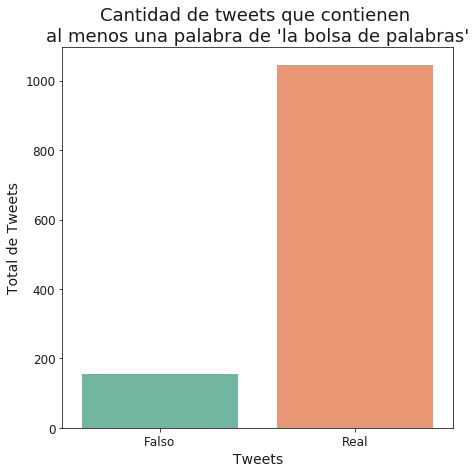

In [62]:
tweets_best_words_target = tweets_text.loc[tweets_text['contain_long_word'] == True].target.value_counts().reset_index().sort_values(by=['target'])
print(tweets_best_words_target)
rcParams['figure.figsize'] = 7,7
ax = sns.barplot(data = tweets_best_words_target,x='index',y='target')
ax.set_title("Cantidad de tweets que contienen \nal menos una palabra de 'la bolsa de palabras'",fontsize= 18)
ax.set_ylabel("Total de Tweets",fontsize= 14)
ax.set_xlabel("Tweets",fontsize= 14)
ax.tick_params(axis="y", labelsize=12)
ax.tick_params(axis="x", labelsize=12)


# ¿Cuales son los Keywords de tweets reales con mayor frecuencia ?

In [35]:
tweets_text_key = tweets.loc[:,['text','keyword','target']].dropna()
tweets_text_key

text     keyword target
3806  Former Township fire truck being used in Phili...  fire truck  Falso
3444  The Dress Memes Have Officially Exploded On Th...    exploded  Falso
3443  Well as I was chaning an iPad screen it fuckin...    exploded  Falso
6219  So does Austin smoke too since he agreed to th...       smoke  Falso
3440  Im Dead!!! My two Loves in 1 photo! My Heart e...    exploded  Falso
6220                Smoke it all http://t.co/79upYdCeMp       smoke  Falso
3438  A tin of Tesco dog food 'exploded' and prompte...    exploded  Falso
3445  My little heart just exploded #OTRAMETLIFE #MT...    exploded  Falso
3436  @CrimsonFuckingV @BitchL0veCannon Even you hav...    exploded  Falso
3434  Toronto going crazy for the blue jays. Can you...     explode  Falso
3433  @DelDryden If I press on the twitch will my he...     explode  Falso
3432       I'm ready to explode! http://t.co/OwJe3i6yGN     explode  Falso
3431                           My head is gonna explode     explode  Falso
3430  @Anonchimp think its a tie with thunderstorms ...     explode  Falso
3429  Learn How I Gained Access To The Secrets Of Th...     explode  Falso
6222  If you wanna smoke cigs that's your own proble...       smoke  Falso
6217                Be Trynna smoke TJ out but he a hoe       smoke  Falso
3447  Just saw The Man Whose Mind Exploded. There sh...    exploded  Falso
3448  I read about that break for hours before twitt...    exploded  Falso
3463  @lunasagalle @synapsenkotze \n'The Exploded - ...    exploded  Falso
6215  I smoke toooooo much lmao I was scared to text...       smoke  Falso
3461  that exploded &amp; brought about the\nbeginni...    exploded  Falso
3460  Yumiko jumped in surprise as the fire shot upw...    exploded  Falso
3459                           My head exploded i swear    exploded  Falso
3458  @MeryCormier haha! Exactly! Cosima is definite...    exploded  Falso
6216          @TheTshirtKid I'm tryna smoke that MF out       smoke  Falso
3456  @ItsNasB now I have to go replace my sarcasm m...    exploded  Falso
3455  Did this man just squeeze another man's head w...    exploded  Falso
3454  holy crap @KingMyth1999 my phone just exploded...    exploded  Falso
3453               luke + microphone = exploded ovaries    exploded  Falso
...                                                 ...         ...    ...
3647  'Among other main factors behind pedestrian fa...  fatalities   Real
3644  I liked a @YouTube video http://t.co/43sXG9Z6x...  fatalities   Real
3642  Govt allocating 1.3 bn for flood action: Issue...  fatalities   Real
3654  No UK train accident fatalities for 8th year r...  fatalities   Real
3641  The RCMP are reporting fatalities and serious ...  fatalities   Real
3638  OSP concerned about mounting fatalities http:/...  fatalities   Real
3637  -??-\n; kitana\n? her fatalities slay me\nÛÓk...  fatalities   Real
3632  #Saudi Arabia: #Abha: Fatalities reported foll...  fatalities   Real
3629  Injuries Illnesses and Fatalities Latest Numbe...  fatalities   Real
3628  @unsuckdcmetro minor train leaves rails. Major...  fatalities   Real
3626  #Seattle's deadliest red light runner intersec...  fatalities   Real
3640  Estimated damage and fatalities of an Hiroshim...  fatalities   Real
3623  Understand that there are no fatalities as no ...  fatalities   Real
3656  PolicyLab is at @CECANF's last public hearing ...  fatalities   Real
3658  #Shipping #Logistics eNCA | Fatalities as migr...  fatalities   Real
3714  @CowgirlLawyer We must refuse to become a nati...        fear   Real
3711  The Opposite of Love is Fear HereÛªs Why\nhtt...        fear   Real
3695  Death of Loretta Fuddy responsible for authent...    fatality   Real
3692  @LindaSOCVAT @TfLBusAlerts Yes apparently. Rep...    fatality   Real
3691  Truck crash on 40w at US70 in Lebanon is a fat...    fatality   Real
3688                   Fatality https://t.co/GF5qjGoyCi    fatality   Real
3657  .@KurtSchlichter Yep considering that *million...  fatalities   Real
3

Agrupación de keyword por similitud

In [36]:
#Recibe una lista de keywords y regresa un diccionario cuyas claves son los elementos de la lista pasada y los valores
#son las keywords agrupadas que las representa
def get_keyword_dic(key_list):
    key_dic = {}
    unique_list = []
    for x in key_list:
        similarity = 0
        value = ""
        for y in unique_list:
            ratio = fuzz.ratio(x,y)
            if ratio > similarity:
                similarity = ratio
                value = y
        if similarity > 75:
            key_dic[x] = value
        else:
            key_dic[x] = x
            unique_list.append(x)
    return key_dic
key_grouped = get_keyword_dic(tweets_text_key.keyword.tolist())

Agrupoamiento manual

In [37]:
key_grouped['blazing'] = 'ablaze'
key_grouped['bleeding'] = 'blood'
key_grouped['buildings on fire'] = 'buildings burning'
key_grouped['burning buildings'] = 'buildings burning'
key_grouped['burning'] = 'burned'
key_grouped['dead'] = 'death'
key_grouped['demolition'] = 'demolish'
key_grouped['destruction'] = 'destroy'
key_grouped['explosion'] = 'explode'
key_grouped['flood'] = 'flooding'
key_grouped['floods'] = 'flooding'
key_grouped['inundated'] = 'inundation'
key_grouped['panic'] = 'panicking'
key_grouped['rainstorm'] = 'rainstorm'
key_grouped['riot'] = 'rioting'
key_grouped['screaming'] = 'screamed'
key_grouped['snowstorm'] = 'snowstorm'
key_grouped['survivors'] = 'survive'
key_grouped['traumatised'] = 'trauma'
key_grouped['violent storm'] = 'storm'
key_grouped['windstorm'] = 'storm'
key_grouped['traumatised'] = 'trauma'

tweets_text_key['keyword_grouped'] = tweets_text_key.keyword.transform(lambda x: key_grouped[x])


 Visualización wordcloud de las keywords categóricas

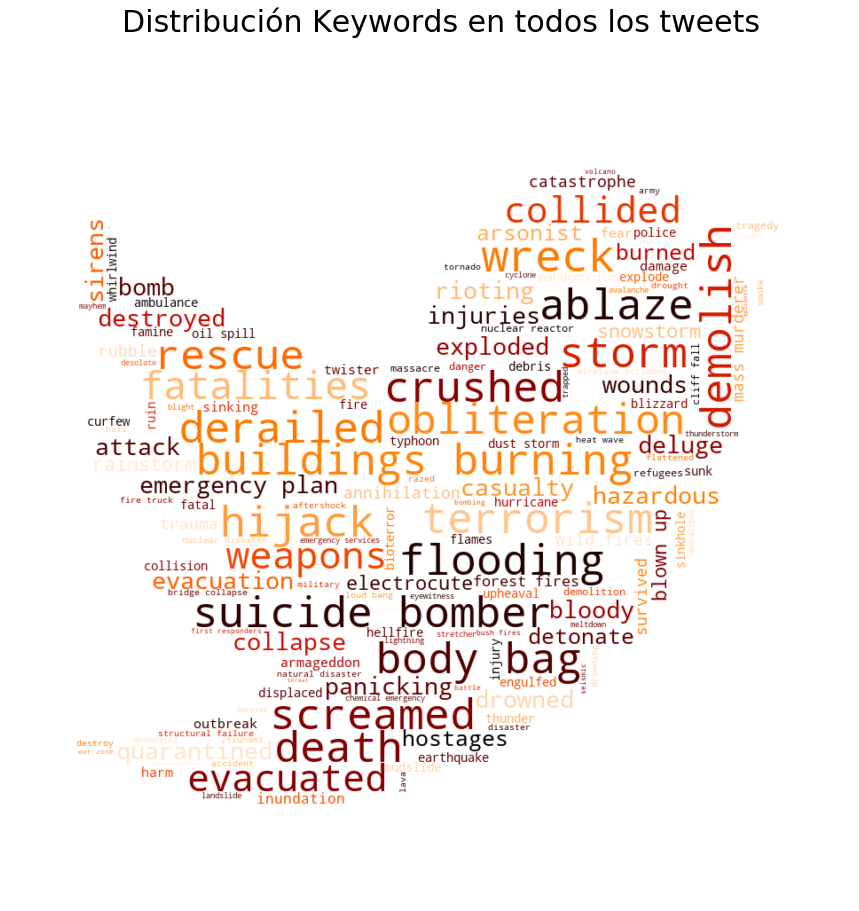

In [38]:
def transform_format(val):
    if val == 1:
        return 255
    else:
        return val

keywords_count = tweets_text_key.keyword_grouped.value_counts()
keywords_count.index = keywords_count.index.map(str)

mask = np.array(Image.open("./img/twitter_black.png"))
mask_transformed = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    mask_transformed[i] = list(map(transform_format, mask[i]))

wordcloud = WordCloud(max_font_size=50, max_words=200, random_state=42, 
                      background_color='white', colormap='gist_heat',
                      mask=mask_transformed)
wordcloud.generate_from_frequencies(keywords_count)

plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Distribución Keywords en todos los tweets", fontsize=30, pad=40)
plt.axis("off")
plt.show()

Porcentaje de verdaderos y falsos por cada keyword¶


In [39]:
keywords_grouped = tweets_text_key.groupby(['keyword_grouped', 'target']).agg({'keyword_grouped':['count']})
keywords_level1 = keywords_grouped.columns.get_level_values(1)
keywords_grouped.columns = keywords_level1
keywords_grouped.reset_index(inplace=True)
keywords_grouped.head(10)

keyword_grouped target  count
0             ablaze  Falso     89
1             ablaze   Real     19
2           accident  Falso     11
3           accident   Real     24
4         aftershock  Falso     34
5  airplane accident  Falso      5
6  airplane accident   Real     30
7          ambulance  Falso     18
8          ambulance   Real     20
9       annihilation  Falso     42

In [40]:
keywords_total_count = tweets_text_key.groupby(['keyword_grouped']).agg({'keyword_grouped': ['count']})
keywords_total_count.columns = 'total_' + keywords_total_count.columns.get_level_values(1)
keywords_total_count.reset_index(inplace=True)
keywords_total_count.head(10)

keyword_grouped  total_count
0             ablaze          108
1           accident           35
2         aftershock           34
3  airplane accident           35
4          ambulance           38
5       annihilation           63
6         apocalypse           32
7         armageddon           42
8               army           34
9           arsonist           66

In [41]:
keywords = keywords_grouped.merge(keywords_total_count, left_on='keyword_grouped', right_on='keyword_grouped', how='left')
keywords.loc[:,'percentage_count'] = (keywords.loc[:, 'count'] / keywords.loc[:, 'total_count']) * 100
keywords.head(10)

keyword_grouped target  count  total_count  percentage_count
0             ablaze  Falso     89          108         82.407407
1             ablaze   Real     19          108         17.592593
2           accident  Falso     11           35         31.428571
3           accident   Real     24           35         68.571429
4         aftershock  Falso     34           34        100.000000
5  airplane accident  Falso      5           35         14.285714
6  airplane accident   Real     30           35         85.714286
7          ambulance  Falso     18           38         47.368421
8          ambulance   Real     20           38         52.631579
9       annihilation  Falso     42           63         66.666667

# Keywords tweets más acertados, tomando como > 90% targeted y frecuencia mayor a 10 (Verdadero)


In [42]:
targeted_keywords = keywords.loc[(keywords['percentage_count'] > 90) & (keywords['total_count'] >= 10) & (keywords['target'] == 'Real')]
targeted_keywords

keyword_grouped target  count  total_count  percentage_count
42            bombing   Real     27           29         93.103448
79             debris   Real     37           37        100.000000
199  nuclear disaster   Real     31           34         91.176471
205         oil spill   Real     37           38         97.368421
207          outbreak   Real     39           40         97.500000
253    suicide bomber   Real     94           99         94.949495
281           typhoon   Real     37           38         97.368421

Text(0,0.5,'Keyword')

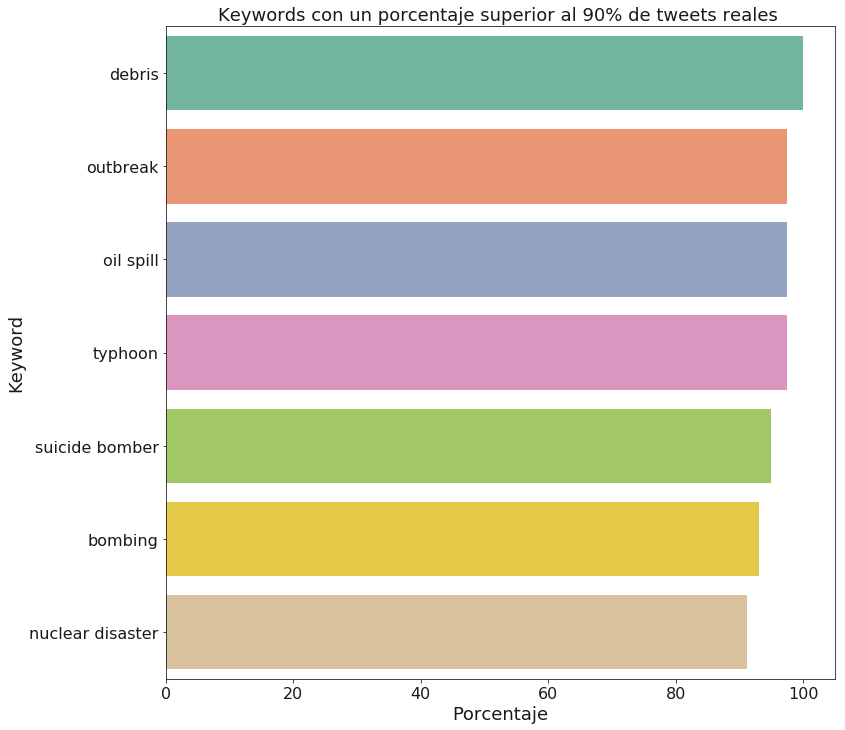

In [64]:
targeted_keywords = targeted_keywords.sort_values(['percentage_count'], ascending=False)
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
g = sns.barplot(x=targeted_keywords['percentage_count'], y=targeted_keywords['keyword_grouped'],
               orient='h')

g.set_title('Keywords con un porcentaje superior al 90% de tweets reales ', fontsize=18)
g.set_xlabel('Porcentaje', fontsize=18)
g.set_ylabel('Keyword', fontsize=18)

# Keywords de tweets menos acertados, tomando como > 90% not targeted y frecuencia mayor a 10 (Falsos)


In [44]:
not_targeted_keywords = keywords.loc[(keywords['percentage_count'] > 90) & (keywords['total_count'] >= 10) & (keywords['target'] == 'Falso')]
not_targeted_keywords

keyword_grouped target  count  total_count  percentage_count
4        aftershock  Falso     34           34        100.000000
27           blight  Falso     30           32         93.750000
37         body bag  Falso    100          107         93.457944
120       epicentre  Falso     11           12         91.666667
156            harm  Falso     37           41         90.243902
210       panicking  Falso     65           70         92.857143
230            ruin  Falso     36           37         97.297297
242           smoke  Falso     31           34         91.176471
248       stretcher  Falso     30           33         90.909091

Text(0,0.5,'Keyword')

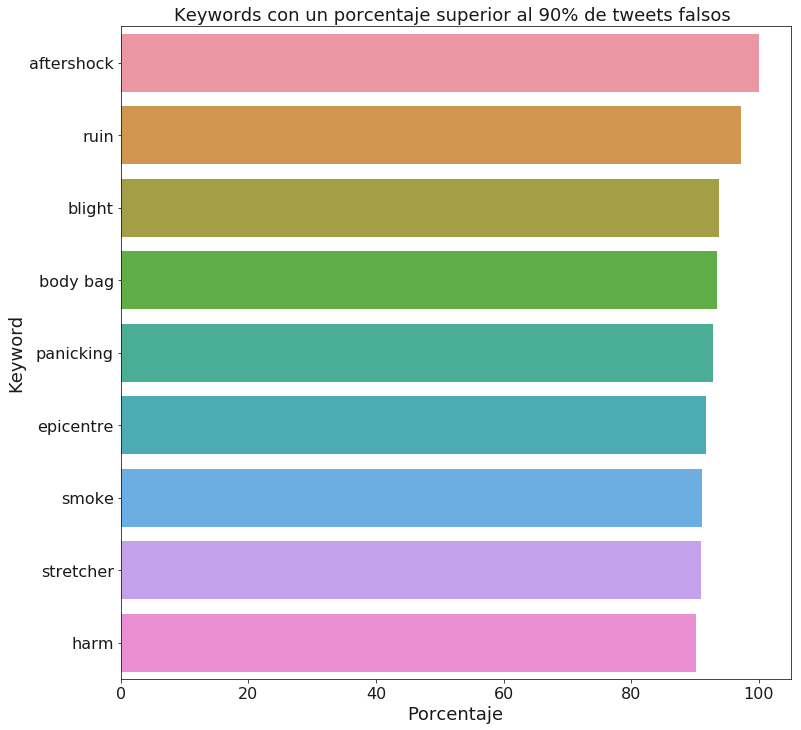

In [65]:
not_targeted_keywords = not_targeted_keywords.sort_values(['percentage_count'], ascending=False)
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis="x", labelsize=16)
ax.tick_params(axis="y", labelsize=16)
g = sns.barplot(x=not_targeted_keywords['percentage_count'], y=not_targeted_keywords['keyword_grouped'],
               orient='h')

g.set_title('Keywords con un porcentaje superior al 90% de tweets falsos ', fontsize=18)
g.set_xlabel('Porcentaje', fontsize=18)
g.set_ylabel('Keyword', fontsize=18)

# Cómo varían los resultados anteriores relacionado al texto para el top 15 de desastres con más tweets?

Se agrupan algunas de las keyword y solo nos quedamos con el top15 (por cantidad de tweets)

In [46]:
key_list_top = tweets_text_key.keyword_grouped.value_counts().nlargest(15).index
tweets_text_key['keyword_top'] = tweets_text_key.keyword_grouped.transform(lambda x: x in key_list_top)
tweets_text_key['target'] = tweets_text_key.target.transform(lambda x: 1 if x == 'Real' else 0)
tweets_text_key_top = tweets_text_key.loc[tweets_text_key.keyword_top].copy()
tweets_text_key_top


text    keyword  target  \
6258                                    FINALLY a storm      storm       0   
6259  #gamefeed Warcraft 3-Inspired Mode Likely Hitt...      storm       0   
6262                  omfg.... I just woke up again....      storm       0   
6263  New on Ebay UK Star Wars Storm Trooper Pop! Vi...      storm       0   
6267  RT @tonyhsieh: 'The person who dances with you...      storm       0   
6268  The Secrets Of The Storm Vortex The Lightning ...      storm       0   
6272  It's okay I welcome the rain. \nGave you all t...      storm       0   
6273  Nike Golf Storm Fit Golf Jacket Black Medium h...      storm       0   
6274  Every time I buy a bag for life I think I've g...      storm       0   
6276  New item: Pillow Covers ANY SIZE Pillow Cover ...      storm       0   
6277                                     this storm????      storm       0   
6278       @johngreen storm and silence by @RobThier_EN      storm       0   
6279  A Warcraft 3-inspired mode is likely coming to...      storm       0   
6282  Finna storm. Fuck my back boutta start hurting...      storm       0   
6285    ice cream + cupcake wars + storm = content sara      storm       0   
6287  The sky's clear the storm has passed but it's ...      storm       0   
6288  Happy birthday @lesley_mariiee ?? I miss you s...      storm       0   
6608  Does this apply to Muslims/terrorism?\nOr Cath...  terrorism       0   
6602  Truth...\nhttps://t.co/beJfTYgJIL\n#News\n#BBC...  terrorism       0   
6603  OMEGA MEN Writer Explores Terrorism Religion I...  terrorism       0   
6615  OMEGA MEN Writer Explores Terrorism Religion I...  terrorism       0   
6614  In #islam saving a person is equal in reward t...  terrorism       0   
6612  Domestic terrorism. No ifs ands or buts about ...  terrorism       0   
6594  Truth...\nhttps://t.co/h6amECX5K7\n#News\n#BBC...  terrorism       0   
6640                       Seek help warra #MetroFmTalk  terrorist       0   
6645  @ShipsXAnchors IDEK HOW IS  THERE PEOPLE WHO A...  terrorist       0   
6646  You May Know Me from Such Roles as Terrorist #...  terrorist       0   
6648  @BarackObama Senator John McCainÛªs Whoops Mo...  terrorist       0   
6658  Don't say @ALIPAPER: women got problems this #...  terrorist       0   
2436  So derailed_benchmark is cool for paths. i won...   derailed       0   
...                                                 ...        ...     ...   
3916  Homecoming Queen Killed on Way Home from the P...      flood       1   
3915  A [small] flood with bigåÊconsequences https:/...      flood       1   
3913  Spot Flood Combo 53inch 300W Curved Cree LED W...      flood       1   
3912  JKL cancels Flash Flood Warning for Bell Harla...      flood       1   
3984  Slip Sliding Away - Flash Floods Info for Writ...     floods       1   
3986  Myanmar Flooding: Heavy monsoon rains during t...     floods       1   
4006  PAGASA 7:12am: YELLOW warning - Panay Island G...     floods       1   
4005  APC Chieftain Tasks Dickson On N15b Floods Don...     floods       1   
4003  Bamenda Floods Kill Animals Birds - http://t.c...     floods       1   
4002  @ContactEnergy Yep. During floods of 1999 or 2...     floods       1   
4000  @casewrites when it rains in NJ it flash flood...     floods       1   
3999  Typhoon Soudelor approaches after 7 killed 2 m...     floods       1   
4007  RT: 40HourFamine: In #Bangladesh government ha...     floods       1   
3998  69 Dead Due to Floods in Myanmar: Naypyidaw Au...     floods       1   
3993  Disaster group stunned by floods http://t.co/j...     floods       1   
3992  @Cyberdemon531 i hope that mountain dew erodes...     floods       1   
3990  Granted like half my town floods when it rains...     floods       1   
3989  @ictyosaur I never thought it would be a wtf m...     floods       1   
3988  @pmharper don't worry I'm sure climate has not...     floods       1   
3987  In #India 119000 people have taken shelter in ...     floods       

# Existen preguntas en los tweets del top 15 por tipo de desastre? como se relacionan estas con su veracidad

In [47]:
tweets_text_key_top['contain_question'] = tweets_text_key_top.text.transform(lambda x: "?" in x)

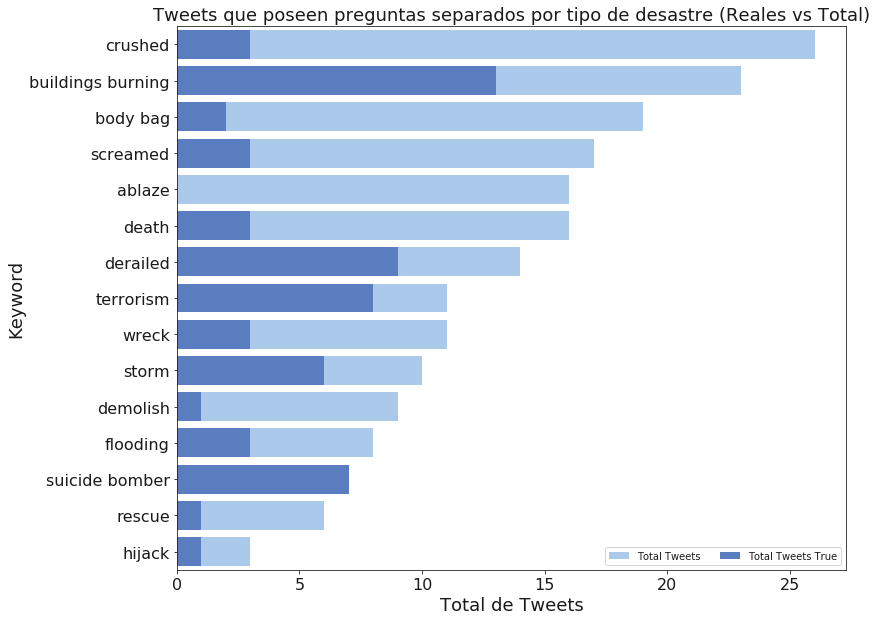

In [66]:
rcParams['figure.figsize'] = 12,10

sns.set_color_codes("pastel")
data= tweets_text_key_top.loc[tweets_text_key_top.contain_question == True].groupby(['keyword_grouped']).agg({'text':['count'],'target':['sum']}).reset_index().sort_values(by=('text','count'),ascending=False)
sns.barplot(data = data,y='keyword_grouped',x=('text','count'), color="b",label= 'Total Tweets')

sns.set_color_codes("muted")
ax = sns.barplot(data = data,y='keyword_grouped',x=('target','sum'), color="b",label= 'Total Tweets True')
ax.set_title("Tweets que poseen preguntas separados por tipo de desastre (Reales vs Total)",fontsize= 18)
ax.set_xlabel("Total de Tweets", fontsize= 18)
ax.set_ylabel("Keyword",fontsize= 18)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.tick_params(axis="y", labelsize=16)
ax.tick_params(axis="x", labelsize=16)


# Cómo se relaciona los tweets del top 15 por tipo de desastre que poseen  enlaces con su veracidad?

In [49]:
tweets_text_key_top['contain_link'] = tweets_text_key_top.text.transform(lambda x: "http" in x)

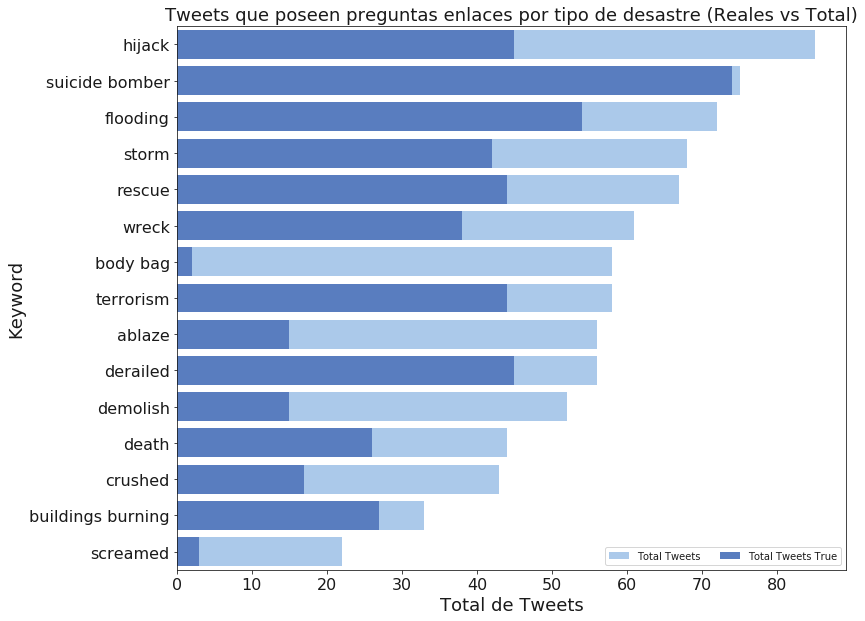

In [67]:
sns.set_color_codes("pastel")
data= tweets_text_key_top.loc[tweets_text_key_top.contain_link == True].groupby(['keyword_grouped']).agg({'text':['count'],'target':['sum']}).reset_index().sort_values(by=('text','count'),ascending=False)
sns.barplot(data = data,y='keyword_grouped',x=('text','count'), color="b",label= 'Total Tweets')

sns.set_color_codes("muted")
ax = sns.barplot(data = data,y='keyword_grouped',x=('target','sum'), color="b",label= 'Total Tweets True')
ax.set_title("Tweets que poseen preguntas enlaces por tipo de desastre (Reales vs Total)",fontsize= 18)
ax.set_xlabel("Total de Tweets",fontsize= 18)
ax.set_ylabel("Keyword",fontsize= 18)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.tick_params(axis="y", labelsize=16)
ax.tick_params(axis="x", labelsize=16)


# ¿Cómo es el "sentimiento" de los textos que poseen un keyword del top 5?

In [51]:
key_list_top = tweets_text_key.keyword_grouped.value_counts().nlargest(5).index
tweets_text_key['keyword_top'] = tweets_text_key.keyword_grouped.transform(lambda x: x in key_list_top)
tweets_text_key["subjectivity_text"]=tweets_text_key.text.transform(subjectivityText)
tweets_text_key["polarity_text"]=tweets_text_key.text.transform(polarityText)
tweets_text_key['target'] = tweets_text_key['target'].transform(lambda x: 'Real' if x == 1 else 'Falso')



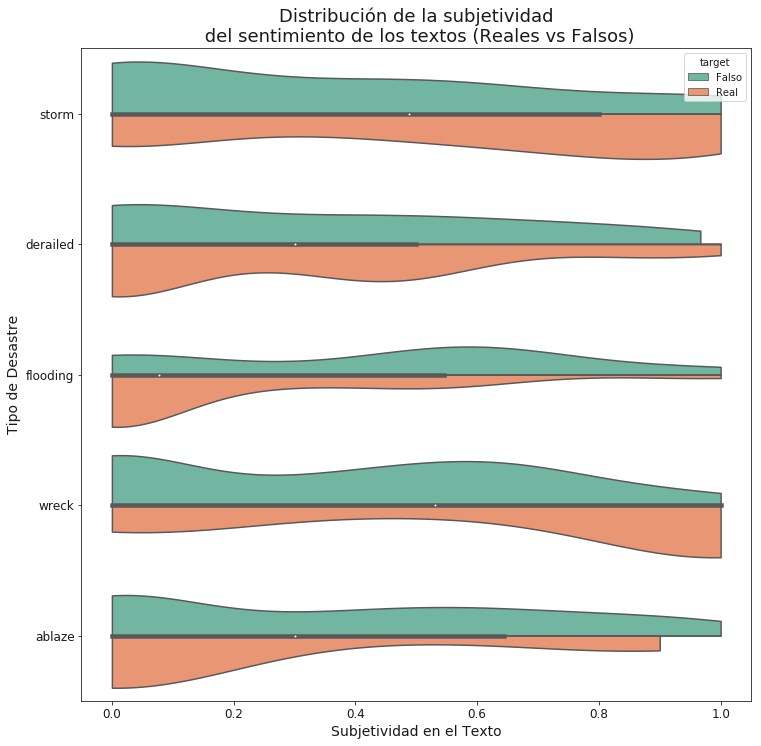

In [52]:
rcParams['figure.figsize'] = 12,12
violin_plt=sns.violinplot(y="keyword_grouped", x="subjectivity_text", hue="target",split=True,data=tweets_text_key.loc[tweets_text_key.keyword_top],cut=0)
violin_plt.set_title("Distribución de la subjetividad\n del sentimiento de los textos (Reales vs Falsos)",fontsize=18)
violin_plt.set_xlabel("Subjetividad en el Texto",fontsize=14)
violin_plt.set_ylabel("Tipo de Desastre",fontsize=14)
violin_plt.tick_params(axis="y", labelsize=12)
violin_plt.tick_params(axis="x", labelsize=12)

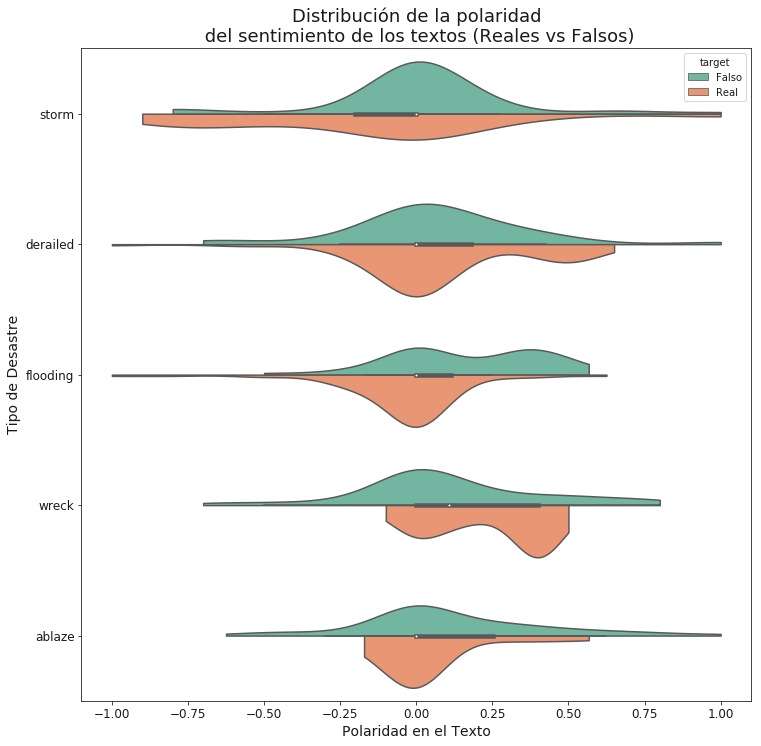

In [53]:
violin_plt=sns.violinplot(y="keyword_grouped", x="polarity_text", hue="target",split=True,data=tweets_text_key.loc[tweets_text_key.keyword_top],cut=0)
violin_plt.set_title("Distribución de la polaridad\n del sentimiento de los textos (Reales vs Falsos)",fontsize=18)
violin_plt.set_xlabel("Polaridad en el Texto",fontsize=14)
violin_plt.set_ylabel("Tipo de Desastre",fontsize=14)
violin_plt.tick_params(axis="y", labelsize=12)
violin_plt.tick_params(axis="x", labelsize=12)


# ¿Cuáles son los paises con mas tweets?

In [54]:
#La transformación de las localidades es muy costosa (3 horas), por lo que se ha generado un .csv con esta columna
#agregada, la misma fue generada a través de la librería geopy.geocoders, el cual para una localidad dada devuelve un 
# objeto de tipo Location el cual posee una dirección, latitud y longitud. Esta herramienta permite agrupar por 
#localidades iguales pero escritas de forma distinta (ejemplo: NYC con new york city)

#tomar en cuenta que una parte de los registros no están ya que o no posee localidad o geocoders no pudo hallar su Location

tweets_location = pd.read_csv('./data/tweets_clean_location.csv', encoding='utf-8')
tweets_location.set_index('Unnamed: 0',inplace=True)
tweets_location

id     keyword                          location  \
Unnamed: 0                                                       
3444        4922    exploded                               USA   
3443        4920    exploded                  Elmwood Park, NJ   
6219        8875       smoke           3.28.15|7.20.15|7.25.15   
6220        8878       smoke               cigarknub@gmail.com   
3438        4914    exploded                            London   
3436        4912    exploded                    Trost District   
3433        4909     explode                     New Hampshire   
3432        4908     explode                          Winnipeg   
3447        4926    exploded                 South east of U.K   
3463        4954    exploded                           Germany   
6215        8866       smoke                        WORLDWI$E    
3459        4948    exploded  WonderlandÛÓ ?????? ???? ??????   
6216        8869       smoke                           atlanta   
3456        4944    exploded                           Jamaica   
3455        4943    exploded                   Antigua ?? NYC    
3454        4940    exploded                       Oakland, Ca   
3453        4938    exploded     lrhcthband;four - bournemouth   
3450        4934    exploded                               USA   
3427        4900     explode                           my deli   
3425        4898     explode                         they/them   
3405        4875     explode         Yamaku Academy, Class 3-4   
3404        4874     explode            New Orleans, Louisiana   
3403        4872     explode          emily | helen | shelley    
3401        4869     explode                  Williamsburg, VA   
3400        4868     explode          London / Berlin / Online   
3397        4864     explode              |IG: imaginedragoner   
6226        8887       smoke              Winnipeg, MB, Canada   
6227        8888       smoke                         Indonesia   
3394        4858  evacuation              Brisbane, Queensland   
3393        4857  evacuation            The Empire/First Order   
...          ...         ...                               ...   
3796        5389  fire truck     Five down from the Coffeeshop   
3742        5319        fire               2 high 2 come down    
3795        5387  fire truck                 Orange County, CA   
3791        5383  fire truck               lost in my thoughts   
3790        5382  fire truck             Orange County, Calif.   
3789        5381  fire truck                      Saipan, CNMI   
3794        5386  fire truck                       Los Angeles   
3730        5301        fear                     Bremerton, WA   
3715        5283        fear                       Bedford IN    
3653        5202  fatalities                          Avon, OH   
3651        5200  fatalities                               USA   
3644        5193  fatalities              oman muscat al seeb    
3642        5191  fatalities              Caserta-Roma, Italy    
3641        5190  fatalities            St. John's, NL, Canada   
3638        5187  fatalities                    Youngstown, OH   
3632        5181  fatalities                    Washington, DC   
3628        5177  fatalities    Washington, DC & Charlotte, NC   
3626        5175  fatalities         #WashingtonState #Seattle   
3640        5189  fatalities                    Nantes, France   
3623        5171  fatalities         Wolverhampton/Brum/Jersey   
3656        5206  fatalities                  Philadelphia, PA   
3714        5282        fear                    Midwestern USA   
3692        5254    fatality        Bishops Stortford, England   
3691        5252    fatality                     Nashville, TN   
3657        5207  fatalities         Just Happy to Be Anywhere   
3679        5234    fatality                             U.S.A   
3668        5222    fatality             Boston Û¢ Cape Cod ?   
3660        5210  fatalities                          

Text(0,0.5,'Pais')

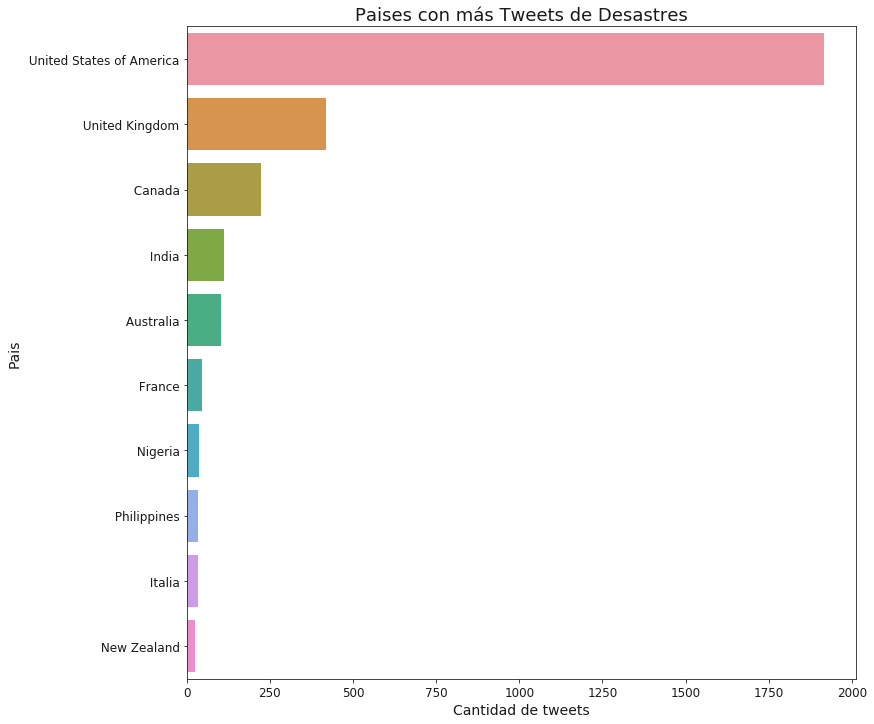

In [55]:
g=sns.barplot(x="country", y="index", data=tweets_location.country.value_counts().nlargest(10).to_frame().reset_index())
g.tick_params(axis="y", labelsize=12)
g.tick_params(axis="x", labelsize=12)
g.set_title('Paises con más Tweets de Desastres', fontsize=18)
g.set_xlabel('Cantidad de tweets', fontsize=14)
g.set_ylabel('Pais', fontsize=14)


In [56]:
fig = go.Figure()

# Recorremos los datos del archivo csv y extraemos sus coordenadas,
# etiquetas a mostrar y especificamos características del marcador
for i in tweets_location:
    fig.add_trace(go.Scattergeo(
            lon = tweets_location['longitude'],
            lat = tweets_location['latitude'],
            marker = dict(
                size = 1,
                color = 'red',
                line_color='white',
                line_width=0.5,
                sizemode = 'area'
        )))
 
# Establecemos las características del mapa base, el título y opciones
# de leyenda, así como la propia proyección del mapa.
fig.update_layout(
    title_text = 'Distribución de los Tweets en el Mundo',
    showlegend = False,
    geo = dict(
        scope='world',
        resolution=110,
        projection_type='mollweide',
        showcoastlines=True,
        showocean=True,
        oceancolor='#132630',
        lakecolor='#132630',
        coastlinecolor='#224354',
        landcolor='#224354',
    )
)
 
# Mostramos la figura creada con las características dadas
fig.show()

# Top 5 países con más de 20 tweets y la cantidad de tweets reales relativo de desastre

In [57]:
count_by_country = tweets_location.groupby(['country']).size().to_frame()
count_by_country.reset_index(inplace=True)
count_by_country.columns = ['country', 'ctry_count']
targeted_tweets_location = tweets_location.loc[tweets_location['target'] == 1].groupby(['country']).size().to_frame()
targeted_tweets_location.reset_index(inplace=True)
targeted_tweets_location.columns = ['country', 'targeted_ctry_count']
count_by_country = count_by_country.merge(targeted_tweets_location, left_on='country', right_on='country')
count_by_country.loc[:,'relative_targeted_ctry_count'] = (count_by_country.loc[:,'targeted_ctry_count'] / count_by_country.loc[:, 'ctry_count'] ) * 100
top_5_ctry_targeted = count_by_country.loc[count_by_country['ctry_count'] > 20].nlargest(5, ['relative_targeted_ctry_count'])



Text(0,0.5,'Pais')

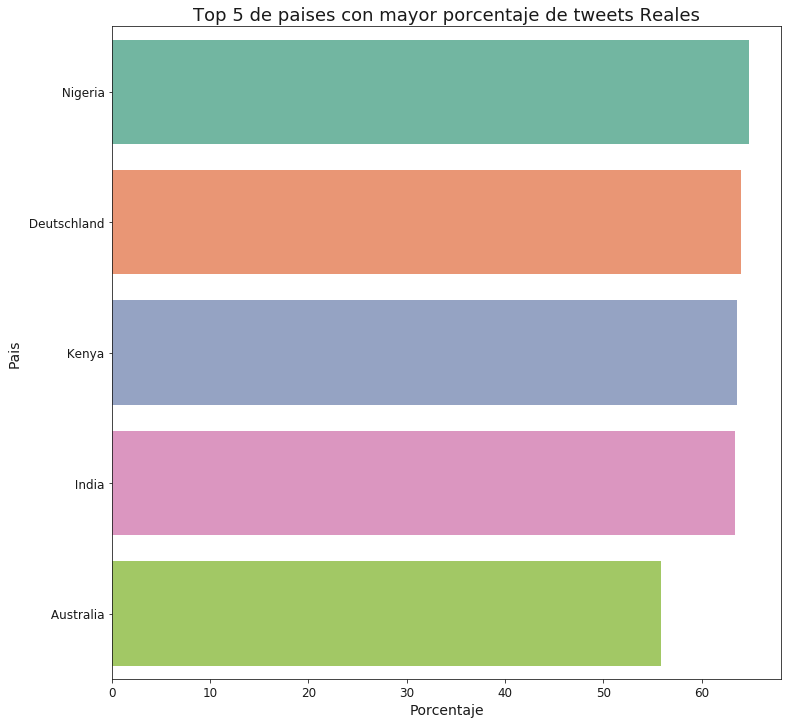

In [58]:
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
g = sns.barplot(x=top_5_ctry_targeted['relative_targeted_ctry_count'], y=top_5_ctry_targeted['country'],
               orient='h')

g.set_title('Top 5 de paises con mayor porcentaje de tweets Reales', fontsize=18)
g.set_xlabel('Porcentaje', fontsize=14)
g.set_ylabel('Pais', fontsize=14)

# Top 5 países con más de 20 tweets y la cantidad de tweets falsos relativo de desastre

In [59]:
not_targeted_tweets_location = tweets_location.loc[tweets_location['target'] == 0].groupby(['country']).size().to_frame()
not_targeted_tweets_location.reset_index(inplace=True)
not_targeted_tweets_location.columns = ['country','not_targeted_ctry_count']
count_by_country = count_by_country.merge(not_targeted_tweets_location, left_on='country', right_on='country')
count_by_country.loc[:,'relative_not_targeted_ctry_count'] = (count_by_country.loc[:,'not_targeted_ctry_count'] / count_by_country.loc[:, 'ctry_count']*100)

top_5_ctry_not_targeted = count_by_country.loc[count_by_country['ctry_count'] > 20].nlargest(5, ['relative_not_targeted_ctry_count'])


Text(0,0.5,'Pais')

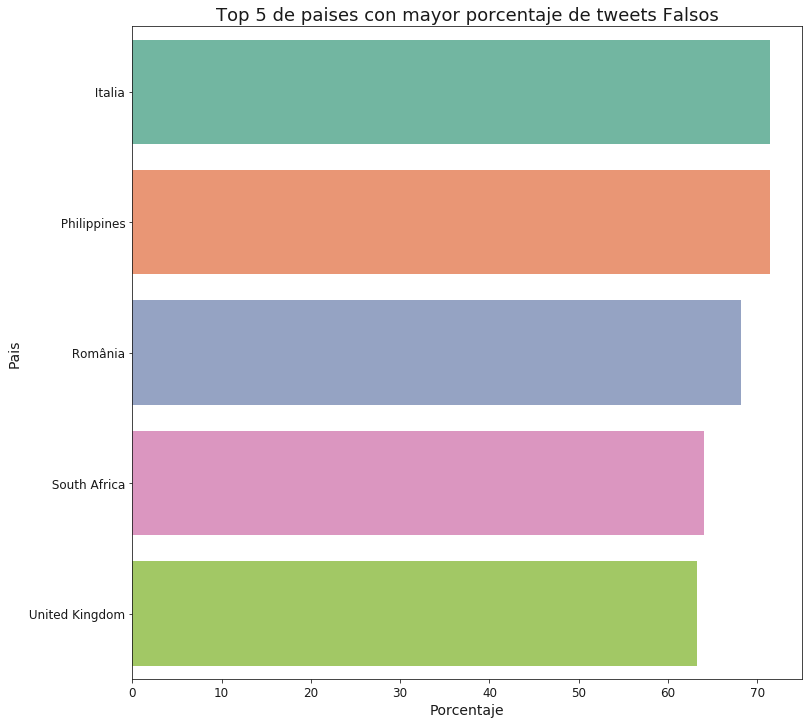

In [60]:
fig, ax = plt.subplots(figsize=(12,12))
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)
g = sns.barplot(x=top_5_ctry_not_targeted['relative_not_targeted_ctry_count'], y=top_5_ctry_not_targeted['country'],
               orient='h')

g.set_title('Top 5 de paises con mayor porcentaje de tweets Falsos', fontsize=18)
g.set_xlabel('Porcentaje', fontsize=14)
g.set_ylabel('Pais', fontsize=14)